# Necessary Comment : jupyter notebook

## Necessary Lighbary



In [35]:
import sqlite3
import pandas as pd
import talib
import mplfinance as mpf
import numpy as np

## Database Connection

In [36]:
connection = sqlite3.connect(r"cripto.db")
cur = connection.cursor()
database_data = cur.execute("select * from asset order by CloseTime").fetchall()

## Dataframe

In [37]:
df = pd.DataFrame(database_data)
df

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,BTCBUSD,16829.70,16839.21,16824.00,16830.20,239.26743,0.00297093828172814,1670500379999,4492.0,109.82889,1.670500e+09
1,2,BTCBUSD,16829.97,16836.30,16822.65,16835.40,167.98137,0.032263872128116,1670500439999,3622.0,77.88053,1.670500e+09
2,3,BTCBUSD,16836.00,16848.11,16831.38,16831.45,239.97661,-0.0270254217153675,1670500499999,4491.0,124.41730,1.670500e+09
3,4,BTCBUSD,16832.47,16846.48,16830.00,16840.79,165.13374,0.0494282776086915,1670500559999,3284.0,84.72219,1.670500e+09
4,5,BTCBUSD,16840.79,16846.59,16836.33,16843.23,156.33532,0.0144886314715562,1670500619999,3151.0,75.63165,1.670501e+09
...,...,...,...,...,...,...,...,...,...,...,...,...
1435,1436,BTCBUSD,17240.68,17241.42,17237.68,17240.69,102.00386,5.8002352566136e-05,1670586479999,1456.0,51.92072,1.670586e+09
1436,1437,BTCBUSD,17240.22,17242.91,17232.50,17240.28,159.27446,0.000348023401079984,1670586539999,1882.0,67.39771,1.670586e+09
1437,1438,BTCBUSD,17240.38,17248.45,17240.31,17247.59,111.62903,0.0418204239117649,1670586599999,1640.0,60.77725,1.670587e+09
1438,1439,BTCBUSD,17247.06,17249.94,17242.03,17248.61,165.98313,0.0089870389504024,1670586659999,2337.0,77.18042,1.670587e+09


## Name Columns

In [38]:
df.columns = ['Id', 'Symbol', 'Open', 'High', 'Low', 'Close', 'VolumeBTC', 'Change', 'CloseTime', 'Trades', 'BuyQuoteVolume', 'Time']
# df = df.iloc[:, 2:12]
df


,Id,Symbol,Open,High,Low,Close,VolumeBTC,Change,CloseTime,Trades,BuyQuoteVolume,Time
0,1,BTCBUSD,16829.70,16839.21,16824.00,16830.20,239.26743,0.00297093828172814,1670500379999,4492.0,109.82889,1.670500e+09
1,2,BTCBUSD,16829.97,16836.30,16822.65,16835.40,167.98137,0.032263872128116,1670500439999,3622.0,77.88053,1.670500e+09
2,3,BTCBUSD,16836.00,16848.11,16831.38,16831.45,239.97661,-0.0270254217153675,1670500499999,4491.0,124.41730,1.670500e+09
3,4,BTCBUSD,16832.47,16846.48,16830.00,16840.79,165.13374,0.0494282776086915,1670500559999,3284.0,84.72219,1.670500e+09
4,5,BTCBUSD,16840.79,16846.59,16836.33,16843.23,156.33532,0.0144886314715562,1670500619999,3151.0,75.63165,1.670501e+09
...,...,...,...,...,...,...,...,...,...,...,...,...
1435,1436,BTCBUSD,17240.68,17241.42,17237.68,17240.69,102.00386,5.8002352566136e-05,1670586479999,1456.0,51.92072,1.670586e+09
1436,1437,BTCBUSD,17240.22,17242.91,17232.50,17240.28,159.27446,0.000348023401079984,1670586539999,1882.0,67.39771,1.670586e+09
1437,1438,BTCBUSD,17240.38,17248.45,17240.31,17247.59,111.62903,0.0418204239117649,1670586599999,1640.0,60.77725,1.670587e+09
1438,1439,BTCBUSD,17247.06,17249.94,17242.03,17248.61,165.98313,0.0089870389504024,1670586659999,2337.0,77.18042,1.670587e+09


# Make a Candle plot

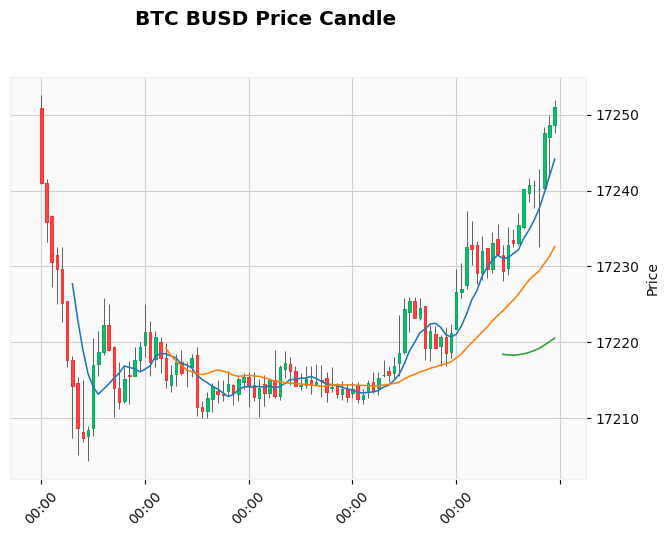

In [39]:
"""
Candle Data Column
"""
df_candle = df[['CloseTime', 'Open', 'High', 'Low', 'Close', 'VolumeBTC']]

"""
Time Indexing
"""
df_candle = df.set_index('CloseTime')
df_candle.index = pd.to_datetime(df.index, unit='ms')

mpf.plot(
    df_candle.tail(100),
#     df,
    mav=[7, 25 , 90],
    type="candle",
#     type="renko",
    title=f"BTC BUSD Price Candle",
    style="yahoo",
)

In [40]:
df = df.set_index('CloseTime')
df.index = pd.to_datetime(df.index, unit='ms')
# df = df.tail(100)
df

,Id,Symbol,Open,High,Low,Close,VolumeBTC,Change,Trades,BuyQuoteVolume,Time
CloseTime,,,,,,,,,,,
2022-12-08 11:52:59.999,1,BTCBUSD,16829.70,16839.21,16824.00,16830.20,239.26743,0.00297093828172814,4492.0,109.82889,1.670500e+09
2022-12-08 11:53:59.999,2,BTCBUSD,16829.97,16836.30,16822.65,16835.40,167.98137,0.032263872128116,3622.0,77.88053,1.670500e+09
2022-12-08 11:54:59.999,3,BTCBUSD,16836.00,16848.11,16831.38,16831.45,239.97661,-0.0270254217153675,4491.0,124.41730,1.670500e+09
2022-12-08 11:55:59.999,4,BTCBUSD,16832.47,16846.48,16830.00,16840.79,165.13374,0.0494282776086915,3284.0,84.72219,1.670500e+09
2022-12-08 11:56:59.999,5,BTCBUSD,16840.79,16846.59,16836.33,16843.23,156.33532,0.0144886314715562,3151.0,75.63165,1.670501e+09
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-09 11:47:59.999,1436,BTCBUSD,17240.68,17241.42,17237.68,17240.69,102.00386,5.8002352566136e-05,1456.0,51.92072,1.670586e+09
2022-12-09 11:48:59.999,1437,BTCBUSD,17240.22,17242.91,17232.50,17240.28,159.27446,0.000348023401079984,1882.0,67.39771,1.670586e+09
2022-12-09 11:49:59.999,1438,BTCBUSD,17240.38,17248.45,17240.31,17247.59,111.62903,0.0418204239117649,1640.0,60.77725,1.670587e+09


# Make a Custom Pattern

C:\Users\user\PycharmProjects\TradingAiDevlopment\venv\lib\site-packages\mplfinance\_arg_validators.py:83: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


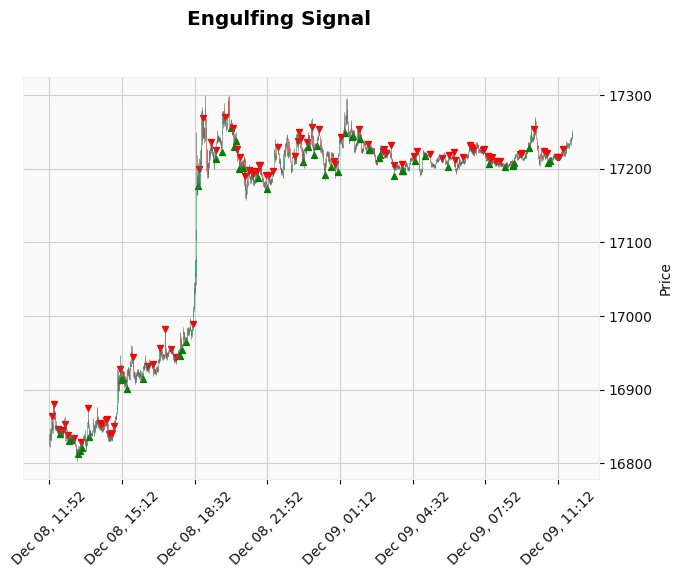

In [41]:
# TODO: ALL all 100 and -100 to the X asis
# Find Candle Pattern
ENGULFING = talib.CDLENGULFING(df['Open'], df['High'], df['Low'],
                                         df['Close'])
# ENGULFING
ENGULFING[ENGULFING != 0]

bullish_engulfing = (ENGULFING.replace([-100, 0], np.nan)/100) *(df.Low-2)
bearsh_engulfing = (-ENGULFING.replace([100, 0], np.nan)/100) *(df.High *1.0001)

addplot = [mpf.make_addplot(bullish_engulfing, type='scatter', color='g', marker = "^"), mpf.make_addplot(bearsh_engulfing, type='scatter', color='r', marker = "v")]
mpf.plot(df, addplot = addplot,title=f"Engulfing Signal", type="candle",style="yahoo")

In [42]:
# dir(talib)

In [43]:
"""
means you are dropping duplicket column.
https://stackoverflow.com/questions/35084071/concat-dataframe-reindexing-only-valid-with-uniquely-valued-index-objects

"""
df = df.head(100)
df = df.reset_index(drop=True) 
df

,Id,Symbol,Open,High,Low,Close,VolumeBTC,Change,Trades,BuyQuoteVolume,Time
0,1,BTCBUSD,16829.70,16839.21,16824.00,16830.20,239.26743,0.00297093828172814,4492.0,109.82889,1.670500e+09
1,2,BTCBUSD,16829.97,16836.30,16822.65,16835.40,167.98137,0.032263872128116,3622.0,77.88053,1.670500e+09
2,3,BTCBUSD,16836.00,16848.11,16831.38,16831.45,239.97661,-0.0270254217153675,4491.0,124.41730,1.670500e+09
3,4,BTCBUSD,16832.47,16846.48,16830.00,16840.79,165.13374,0.0494282776086915,3284.0,84.72219,1.670500e+09
4,5,BTCBUSD,16840.79,16846.59,16836.33,16843.23,156.33532,0.0144886314715562,3151.0,75.63165,1.670501e+09
5,6,BTCBUSD,16842.86,16861.70,16842.60,16852.64,267.03005,0.0580661479107398,4706.0,144.22571,1.670501e+09
6,7,BTCBUSD,16852.52,16855.71,16840.56,16849.52,149.69755,-0.017801492002383,3327.0,71.63636,1.670501e+09
7,8,BTCBUSD,16850.06,16857.46,16845.59,16851.76,158.83347,0.0100889848463275,3705.0,74.28113,1.670501e+09
8,9,BTCBUSD,16852.36,16861.99,16847.06,16847.08,229.26116,-0.0313309233840176,4637.0,102.69333,1.670501e+09
9,10,BTCBUSD,16848.17,16852.89,16841.20,16850.50,187.46338,0.0138293951212609,3485.0,104.55864,1.670501e+09


# Make Dataframe From Binance Data

In [44]:
from dataframe import GetDataframe
df = GetDataframe().data_function('BTCBUSD', 1, 100)
df

,Open,High,Low,Close,VolumeBTC,CloseTime,VolumeBUSD,Trades,BuyQuoteVolume,Change,symbol
Time,,,,,,,,,,,
2022-12-10 01:24:00,17151.30,17162.36,17150.57,17161.92,97.08333,1.670635e+12,1.665490e+06,1267.0,54.55340,0.061920,BTCBUSD
2022-12-10 01:25:00,17162.48,17163.55,17159.32,17159.32,60.53088,1.670636e+12,1.038810e+06,898.0,29.54723,-0.018412,BTCBUSD
2022-12-10 01:26:00,17159.33,17160.23,17156.62,17158.91,46.15812,1.670636e+12,7.920134e+05,887.0,26.14363,-0.002448,BTCBUSD
2022-12-10 01:27:00,17159.28,17164.02,17157.69,17162.88,44.60267,1.670636e+12,7.653829e+05,822.0,26.42948,0.020980,BTCBUSD
2022-12-10 01:28:00,17163.25,17163.94,17157.79,17159.37,56.07281,1.670636e+12,9.622942e+05,1030.0,29.15281,-0.022606,BTCBUSD
2022-12-10 01:29:00,17159.37,17160.45,17158.00,17159.28,29.53006,1.670636e+12,5.067125e+05,651.0,15.94391,-0.000524,BTCBUSD
2022-12-10 01:30:00,17159.28,17167.82,17156.16,17162.36,155.79470,1.670636e+12,2.673760e+06,1902.0,92.87318,0.017949,BTCBUSD
2022-12-10 01:31:00,17162.36,17165.99,17161.60,17162.45,63.51199,1.670636e+12,1.090113e+06,1190.0,35.06146,0.000524,BTCBUSD
2022-12-10 01:32:00,17162.86,17162.93,17159.35,17161.03,55.65319,1.670636e+12,9.550497e+05,995.0,25.23382,-0.010663,BTCBUSD


## Get Result and All the candlesticks from Ta-Lib

In [45]:
results = []
cols = []
for attr in dir(talib):
    if attr[:3]=='CDL':
#         print(getattr(talib, attr))
        res = getattr(talib, attr)(df['Open'], df['High'], df['Low'],
                                         df['Close'])
        results.append(res)
        cols.append(attr)
print(results)
print(cols)

[Time
2022-12-10 01:24:00    0
2022-12-10 01:25:00    0
2022-12-10 01:26:00    0
2022-12-10 01:27:00    0
2022-12-10 01:28:00    0
2022-12-10 01:29:00    0
2022-12-10 01:30:00    0
2022-12-10 01:31:00    0
2022-12-10 01:32:00    0
2022-12-10 01:33:00    0
2022-12-10 01:34:00    0
2022-12-10 01:35:00    0
2022-12-10 01:36:00    0
2022-12-10 01:37:00    0
2022-12-10 01:38:00    0
2022-12-10 01:39:00    0
2022-12-10 01:40:00    0
2022-12-10 01:41:00    0
2022-12-10 01:42:00    0
2022-12-10 01:43:00    0
2022-12-10 01:44:00    0
2022-12-10 01:45:00    0
2022-12-10 01:46:00    0
2022-12-10 01:47:00    0
2022-12-10 01:48:00    0
2022-12-10 01:49:00    0
2022-12-10 01:50:00    0
2022-12-10 01:51:00    0
2022-12-10 01:52:00    0
2022-12-10 01:53:00    0
2022-12-10 01:54:00    0
2022-12-10 01:55:00    0
2022-12-10 01:56:00    0
2022-12-10 01:57:00    0
2022-12-10 01:58:00    0
2022-12-10 01:59:00    0
2022-12-10 02:00:00    0
2022-12-10 02:01:00    0
2022-12-10 02:02:00    0
2022-12-10 02:03:00

## Frame all candle and add sum of the candle result

In [46]:
patterns = pd.DataFrame(results).T
patterns.columns = cols
patterns.astype(float)
patterns["Sum"] = patterns.sum(axis=1)
patterns

,CDL2CROWS,CDL3BLACKCROWS,CDL3INSIDE,CDL3LINESTRIKE,CDL3OUTSIDE,CDL3STARSINSOUTH,CDL3WHITESOLDIERS,CDLABANDONEDBABY,CDLADVANCEBLOCK,CDLBELTHOLD,CDLBREAKAWAY,CDLCLOSINGMARUBOZU,CDLCONCEALBABYSWALL,CDLCOUNTERATTACK,CDLDARKCLOUDCOVER,CDLDOJI,CDLDOJISTAR,CDLDRAGONFLYDOJI,CDLENGULFING,CDLEVENINGDOJISTAR,CDLEVENINGSTAR,CDLGAPSIDESIDEWHITE,CDLGRAVESTONEDOJI,CDLHAMMER,CDLHANGINGMAN,CDLHARAMI,CDLHARAMICROSS,CDLHIGHWAVE,CDLHIKKAKE,CDLHIKKAKEMOD,CDLHOMINGPIGEON,CDLIDENTICAL3CROWS,CDLINNECK,CDLINVERTEDHAMMER,CDLKICKING,CDLKICKINGBYLENGTH,CDLLADDERBOTTOM,CDLLONGLEGGEDDOJI,CDLLONGLINE,CDLMARUBOZU,CDLMATCHINGLOW,CDLMATHOLD,CDLMORNINGDOJISTAR,CDLMORNINGSTAR,CDLONNECK,CDLPIERCING,CDLRICKSHAWMAN,CDLRISEFALL3METHODS,CDLSEPARATINGLINES,CDLSHOOTINGSTAR,CDLSHORTLINE,CDLSPINNINGTOP,CDLSTALLEDPATTERN,CDLSTICKSANDWICH,CDLTAKURI,CDLTASUKIGAP,CDLTHRUSTING,CDLTRISTAR,CDLUNIQUE3RIVER,CDLUPSIDEGAP2CROWS,CDLXSIDEGAP3METHODS,Sum
Time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-12-10 01:24:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2022-12-10 01:25:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2022-12-10 01:26:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2022-12-10 01:27:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2022-12-10 01:28:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2022-12-10 01:29:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2022-12-10 01:30:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2022-12-10 01:31:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2022-12-10 01:32:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-100,0,0,0,0,0,0,0,0,0,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Saferate Numeracdata from dataframe

In [47]:
df = df.iloc[:,0:10]
df.astype(float)

,Open,High,Low,Close,VolumeBTC,CloseTime,VolumeBUSD,Trades,BuyQuoteVolume,Change
Time,,,,,,,,,,
2022-12-10 01:24:00,17151.30,17162.36,17150.57,17161.92,97.08333,1.670635e+12,1.665490e+06,1267.0,54.55340,0.061920
2022-12-10 01:25:00,17162.48,17163.55,17159.32,17159.32,60.53088,1.670636e+12,1.038810e+06,898.0,29.54723,-0.018412
2022-12-10 01:26:00,17159.33,17160.23,17156.62,17158.91,46.15812,1.670636e+12,7.920134e+05,887.0,26.14363,-0.002448
2022-12-10 01:27:00,17159.28,17164.02,17157.69,17162.88,44.60267,1.670636e+12,7.653829e+05,822.0,26.42948,0.020980
2022-12-10 01:28:00,17163.25,17163.94,17157.79,17159.37,56.07281,1.670636e+12,9.622942e+05,1030.0,29.15281,-0.022606
2022-12-10 01:29:00,17159.37,17160.45,17158.00,17159.28,29.53006,1.670636e+12,5.067125e+05,651.0,15.94391,-0.000524
2022-12-10 01:30:00,17159.28,17167.82,17156.16,17162.36,155.79470,1.670636e+12,2.673760e+06,1902.0,92.87318,0.017949
2022-12-10 01:31:00,17162.36,17165.99,17161.60,17162.45,63.51199,1.670636e+12,1.090113e+06,1190.0,35.06146,0.000524
2022-12-10 01:32:00,17162.86,17162.93,17159.35,17161.03,55.65319,1.670636e+12,9.550497e+05,995.0,25.23382,-0.010663


## Combine two Dataframe

In [55]:
df = df.add(patterns, fill_value=0)
df.head(60)

,BuyQuoteVolume,CDL2CROWS,CDL3BLACKCROWS,CDL3INSIDE,CDL3LINESTRIKE,CDL3OUTSIDE,CDL3STARSINSOUTH,CDL3WHITESOLDIERS,CDLABANDONEDBABY,CDLADVANCEBLOCK,CDLBELTHOLD,CDLBREAKAWAY,CDLCLOSINGMARUBOZU,CDLCONCEALBABYSWALL,CDLCOUNTERATTACK,CDLDARKCLOUDCOVER,CDLDOJI,CDLDOJISTAR,CDLDRAGONFLYDOJI,CDLENGULFING,CDLEVENINGDOJISTAR,CDLEVENINGSTAR,CDLGAPSIDESIDEWHITE,CDLGRAVESTONEDOJI,CDLHAMMER,CDLHANGINGMAN,CDLHARAMI,CDLHARAMICROSS,CDLHIGHWAVE,CDLHIKKAKE,CDLHIKKAKEMOD,CDLHOMINGPIGEON,CDLIDENTICAL3CROWS,CDLINNECK,CDLINVERTEDHAMMER,CDLKICKING,CDLKICKINGBYLENGTH,CDLLADDERBOTTOM,CDLLONGLEGGEDDOJI,CDLLONGLINE,CDLMARUBOZU,CDLMATCHINGLOW,CDLMATHOLD,CDLMORNINGDOJISTAR,CDLMORNINGSTAR,CDLONNECK,CDLPIERCING,CDLRICKSHAWMAN,CDLRISEFALL3METHODS,CDLSEPARATINGLINES,CDLSHOOTINGSTAR,CDLSHORTLINE,CDLSPINNINGTOP,CDLSTALLEDPATTERN,CDLSTICKSANDWICH,CDLTAKURI,CDLTASUKIGAP,CDLTHRUSTING,CDLTRISTAR,CDLUNIQUE3RIVER,CDLUPSIDEGAP2CROWS,CDLXSIDEGAP3METHODS,Change,Close,CloseTime,High,Low,Open,Sum,Trades,VolumeBTC,VolumeBUSD
Time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-12-10 01:24:00,54.55340,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.061920,17161.92,1.670635e+12,17162.36,17150.57,17151.30,0.0,1267.0,97.08333,1.665490e+06
2022-12-10 01:25:00,29.54723,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.018412,17159.32,1.670636e+12,17163.55,17159.32,17162.48,0.0,898.0,60.53088,1.038810e+06
2022-12-10 01:26:00,26.14363,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.002448,17158.91,1.670636e+12,17160.23,17156.62,17159.33,0.0,887.0,46.15812,7.920134e+05
2022-12-10 01:27:00,26.42948,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.020980,17162.88,1.670636e+12,17164.02,17157.69,17159.28,0.0,822.0,44.60267,7.653829e+05
2022-12-10 01:28:00,29.15281,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.022606,17159.37,1.670636e+12,17163.94,17157.79,17163.25,0.0,1030.0,56.07281,9.622942e+05
2022-12-10 01:29:00,15.94391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000524,17159.28,1.670636e+12,17160.45,17158.00,17159.37,0.0,651.0,29.53006,5.067125e+05
2022-12-10 01:30:00,92.87318,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017949,17162.36,1.670636e+12,17167.82,17156.16,17159.28,0.0,1902.0,155.79470,2.673760e+06
2022-12-10 01:31:00,35.06146,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000524,17162.45,1.670636e+12,17165.99,17161.60,17162.36,0.0,1190.0,63.51199,1.090113e+06
2022-12-10 01:32:00

## Make a plot to see the sum

Time
2022-12-10 01:24:00       0
2022-12-10 01:25:00       0
2022-12-10 01:26:00       0
2022-12-10 01:27:00       0
2022-12-10 01:28:00       0
2022-12-10 01:29:00       0
2022-12-10 01:30:00       0
2022-12-10 01:31:00       0
2022-12-10 01:32:00       0
2022-12-10 01:33:00    -200
2022-12-10 01:34:00    -200
2022-12-10 01:35:00     200
2022-12-10 01:36:00    -400
2022-12-10 01:37:00       0
2022-12-10 01:38:00    -400
2022-12-10 01:39:00    -200
2022-12-10 01:40:00     600
2022-12-10 01:41:00     800
2022-12-10 01:42:00    -400
2022-12-10 01:43:00     400
2022-12-10 01:44:00     200
2022-12-10 01:45:00    -200
2022-12-10 01:46:00    -200
2022-12-10 01:47:00       0
2022-12-10 01:48:00    -400
2022-12-10 01:49:00       0
2022-12-10 01:50:00     200
2022-12-10 01:51:00    -400
2022-12-10 01:52:00    1000
2022-12-10 01:53:00       0
2022-12-10 01:54:00       0
2022-12-10 01:55:00     200
2022-12-10 01:56:00    -400
2022-12-10 01:57:00     200
2022-12-10 01:58:00     400
2022-12-10 01:5

<AxesSubplot: xlabel='Time'>

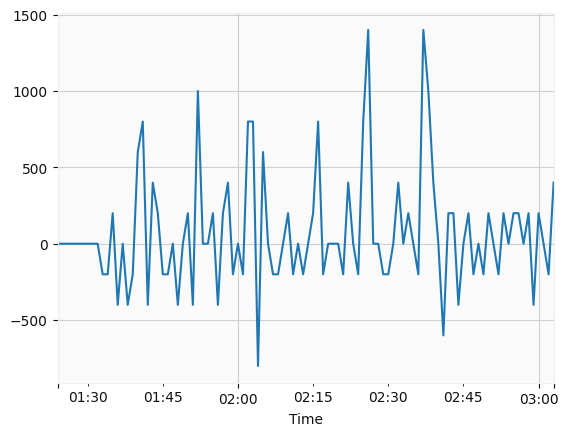

In [49]:
all_pats = patterns.sum(axis=1)
print(all_pats)
all_pats.plot()

## X paramiter for feeding Model

In [51]:
X = df.drop(['CloseTime', 'Sum'], axis=1)
X

['BuyQuoteVolume', 'CDL2CROWS', 'CDL3BLACKCROWS', 'CDL3INSIDE', 'CDL3LINESTRIKE', 'CDL3OUTSIDE', 'CDL3STARSINSOUTH', 'CDL3WHITESOLDIERS', 'CDLABANDONEDBABY', 'CDLADVANCEBLOCK', 'CDLBELTHOLD', 'CDLBREAKAWAY', 'CDLCLOSINGMARUBOZU', 'CDLCONCEALBABYSWALL', 'CDLCOUNTERATTACK', 'CDLDARKCLOUDCOVER', 'CDLDOJI', 'CDLDOJISTAR', 'CDLDRAGONFLYDOJI', 'CDLENGULFING', 'CDLEVENINGDOJISTAR', 'CDLEVENINGSTAR', 'CDLGAPSIDESIDEWHITE', 'CDLGRAVESTONEDOJI', 'CDLHAMMER', 'CDLHANGINGMAN', 'CDLHARAMI', 'CDLHARAMICROSS', 'CDLHIGHWAVE', 'CDLHIKKAKE', 'CDLHIKKAKEMOD', 'CDLHOMINGPIGEON', 'CDLIDENTICAL3CROWS', 'CDLINNECK', 'CDLINVERTEDHAMMER', 'CDLKICKING', 'CDLKICKINGBYLENGTH', 'CDLLADDERBOTTOM', 'CDLLONGLEGGEDDOJI', 'CDLLONGLINE', 'CDLMARUBOZU', 'CDLMATCHINGLOW', 'CDLMATHOLD', 'CDLMORNINGDOJISTAR', 'CDLMORNINGSTAR', 'CDLONNECK', 'CDLPIERCING', 'CDLRICKSHAWMAN', 'CDLRISEFALL3METHODS', 'CDLSEPARATINGLINES', 'CDLSHOOTINGSTAR', 'CDLSHORTLINE', 'CDLSPINNINGTOP', 'CDLSTALLEDPATTERN', 'CDLSTICKSANDWICH', 'CDLTAKURI', 'C

,BuyQuoteVolume,CDL2CROWS,CDL3BLACKCROWS,CDL3INSIDE,CDL3LINESTRIKE,CDL3OUTSIDE,CDL3STARSINSOUTH,CDL3WHITESOLDIERS,CDLABANDONEDBABY,CDLADVANCEBLOCK,CDLBELTHOLD,CDLBREAKAWAY,CDLCLOSINGMARUBOZU,CDLCONCEALBABYSWALL,CDLCOUNTERATTACK,CDLDARKCLOUDCOVER,CDLDOJI,CDLDOJISTAR,CDLDRAGONFLYDOJI,CDLENGULFING,CDLEVENINGDOJISTAR,CDLEVENINGSTAR,CDLGAPSIDESIDEWHITE,CDLGRAVESTONEDOJI,CDLHAMMER,CDLHANGINGMAN,CDLHARAMI,CDLHARAMICROSS,CDLHIGHWAVE,CDLHIKKAKE,CDLHIKKAKEMOD,CDLHOMINGPIGEON,CDLIDENTICAL3CROWS,CDLINNECK,CDLINVERTEDHAMMER,CDLKICKING,CDLKICKINGBYLENGTH,CDLLADDERBOTTOM,CDLLONGLEGGEDDOJI,CDLLONGLINE,CDLMARUBOZU,CDLMATCHINGLOW,CDLMATHOLD,CDLMORNINGDOJISTAR,CDLMORNINGSTAR,CDLONNECK,CDLPIERCING,CDLRICKSHAWMAN,CDLRISEFALL3METHODS,CDLSEPARATINGLINES,CDLSHOOTINGSTAR,CDLSHORTLINE,CDLSPINNINGTOP,CDLSTALLEDPATTERN,CDLSTICKSANDWICH,CDLTAKURI,CDLTASUKIGAP,CDLTHRUSTING,CDLTRISTAR,CDLUNIQUE3RIVER,CDLUPSIDEGAP2CROWS,CDLXSIDEGAP3METHODS,Change,Close,High,Low,Open,Trades,VolumeBTC,VolumeBUSD
Time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-12-10 01:24:00,54.55340,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.061920,17161.92,17162.36,17150.57,17151.30,1267.0,97.08333,1.665490e+06
2022-12-10 01:25:00,29.54723,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.018412,17159.32,17163.55,17159.32,17162.48,898.0,60.53088,1.038810e+06
2022-12-10 01:26:00,26.14363,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.002448,17158.91,17160.23,17156.62,17159.33,887.0,46.15812,7.920134e+05
2022-12-10 01:27:00,26.42948,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.020980,17162.88,17164.02,17157.69,17159.28,822.0,44.60267,7.653829e+05
2022-12-10 01:28:00,29.15281,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.022606,17159.37,17163.94,17157.79,17163.25,1030.0,56.07281,9.622942e+05
2022-12-10 01:29:00,15.94391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000524,17159.28,17160.45,17158.00,17159.37,651.0,29.53006,5.067125e+05
2022-12-10 01:30:00,92.87318,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017949,17162.36,17167.82,17156.16,17159.28,1902.0,155.79470,2.673760e+06
2022-12-10 01:31:00,35.06146,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000524,17162.45,17165.99,17161.60,17162.36,1190.0,63.51199,1.090113e+06
2022-12-10 01:32:00,25.23382,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0

## Y paramiter for feedind Model

In [18]:
y = df['Sum']
y

Time
2022-12-10 01:16:00      0.0
2022-12-10 01:17:00      0.0
2022-12-10 01:18:00      0.0
2022-12-10 01:19:00      0.0
2022-12-10 01:20:00      0.0
2022-12-10 01:21:00      0.0
2022-12-10 01:22:00    100.0
2022-12-10 01:23:00      0.0
2022-12-10 01:24:00    200.0
2022-12-10 01:25:00      0.0
2022-12-10 01:26:00    100.0
2022-12-10 01:27:00      0.0
2022-12-10 01:28:00      0.0
2022-12-10 01:29:00    200.0
2022-12-10 01:30:00      0.0
2022-12-10 01:31:00    400.0
2022-12-10 01:32:00      0.0
2022-12-10 01:33:00   -200.0
2022-12-10 01:34:00   -100.0
2022-12-10 01:35:00    100.0
2022-12-10 01:36:00   -200.0
2022-12-10 01:37:00      0.0
2022-12-10 01:38:00   -200.0
2022-12-10 01:39:00   -100.0
2022-12-10 01:40:00    300.0
2022-12-10 01:41:00    400.0
2022-12-10 01:42:00   -200.0
2022-12-10 01:43:00    200.0
2022-12-10 01:44:00    100.0
2022-12-10 01:45:00   -100.0
2022-12-10 01:46:00   -100.0
2022-12-10 01:47:00      0.0
2022-12-10 01:48:00   -200.0
2022-12-10 01:49:00      0.0
2022-12-1

## Model for AI Research

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

model = DecisionTreeClassifier()
#model=RandomForestClassifier()
model

DecisionTreeClassifier()

## Fit X and y data to model

In [20]:
model.fit(X, y)

DecisionTreeClassifier()

## Directally Grab Fidable data from internet but it have to be superviged test data from database

In [21]:
from dataframe import GetDataframe
symbol = "BTCBUSD"

df = GetDataframe().get_minute_data(symbol, 1, 5)
df = df.iloc[:,0:10]
df.astype(float)
# df = df.drop(columns=['symbol','VolumeBUSD', 'CloseTime'])
# df = df.iloc[0]
# print(df)
results = []
cols = []
for attr in dir(talib):
    if attr[:3]=='CDL':
#         print(getattr(talib, attr))
        res = getattr(talib, attr)(df['Open'], df['High'], df['Low'],
                                         df['Close'])
        results.append(res)
        cols.append(attr)
# print(results)
# print(cols)

patterns = pd.DataFrame(results).T
patterns.columns = cols
patterns.astype(float)
patterns["Sum"] = patterns.sum(axis=1)
patterns
df = df.add(patterns, fill_value=0)
df = df.drop(['CloseTime', 'Sum'], axis=1)
df = df.iloc[0]
# print(df)
print(model.predict([df]))

[100.]


C:\Users\user\PycharmProjects\TradingAiDevlopment\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## Calculating the Accuracy
### Normally I take very small data for that but in real application we have to take very big dataset

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.8)

model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy_score(y_test, predictions)

0.25

## Export Train model

In [23]:
import joblib
joblib.dump(model, "btcbusd_trand_predictor.joblib")

['btcbusd_trand_predictor.joblib']

## Make Prediction With Train Model

In [24]:
# print(df)

model = joblib.load("btcbusd_trand_predictor.joblib")
predictions = model.predict([df])
predictions

C:\Users\user\PycharmProjects\TradingAiDevlopment\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([100.])

## All Coulms need for creat a Visual Representation

In [54]:
feature_name = list(X.columns)

## Export model in dot visual language
class_names=sorted(y.unique()),

In [53]:
from sklearn import tree
model = DecisionTreeClassifier()
model.fit(X, y)
tree.export_graphviz(model, out_file='btc_busd_visual.dot',
                    feature_names=feature_name,
                     label='all',
                     rounded=True,
                     filled=True     
                    )